In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
DATA_DIR = 'data'
STEPS = 12000
BATCH_SIZE = 50

In [3]:
data = input_data.read_data_sets(DATA_DIR, one_hot=True) #the class is represented as binary string of length 10 with a single 1

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [4]:
X = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.truncated_normal([784,10]))
b = tf.Variable(tf.zeros([1,10]))

In [5]:
y_true = tf.placeholder(tf.float32, [None, 10])
y_pred = tf.matmul(X,W)+b

In [6]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true))

In [7]:
learning_rate = 0.2

In [8]:
optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [9]:
correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        x, y = data.train.next_batch(BATCH_SIZE)
        sess.run(optim, feed_dict={X: x, y_true: y})
        if i == 0 or (i+1) %400 == 0:
            acc = sess.run(accuracy, feed_dict={X: data.test.images, y_true: data.test.labels})
            print("Step: {}".format(i+1), "\tAccuracy: {:.4}".format(acc*100))
    W_trained = W.eval()
    b_trained = b.eval()

Step: 1 	Accuracy: 14.31
Step: 400 	Accuracy: 80.73
Step: 800 	Accuracy: 84.3
Step: 1200 	Accuracy: 86.44
Step: 1600 	Accuracy: 86.84
Step: 2000 	Accuracy: 87.89
Step: 2400 	Accuracy: 88.19
Step: 2800 	Accuracy: 88.46
Step: 3200 	Accuracy: 88.47
Step: 3600 	Accuracy: 89.2
Step: 4000 	Accuracy: 89.24
Step: 4400 	Accuracy: 89.26
Step: 4800 	Accuracy: 89.56
Step: 5200 	Accuracy: 89.74
Step: 5600 	Accuracy: 90.07
Step: 6000 	Accuracy: 89.94
Step: 6400 	Accuracy: 90.06
Step: 6800 	Accuracy: 89.95
Step: 7200 	Accuracy: 90.01
Step: 7600 	Accuracy: 90.31
Step: 8000 	Accuracy: 90.44
Step: 8400 	Accuracy: 90.42
Step: 8800 	Accuracy: 89.98
Step: 9200 	Accuracy: 90.26
Step: 9600 	Accuracy: 90.57
Step: 10000 	Accuracy: 90.36
Step: 10400 	Accuracy: 90.46
Step: 10800 	Accuracy: 90.57
Step: 11200 	Accuracy: 90.8
Step: 11600 	Accuracy: 90.54
Step: 12000 	Accuracy: 90.82


In [11]:
tx = data.test.images
ty = data.test.labels

In [12]:
tx.shape, ty.shape

((10000, 784), (10000, 10))

2898


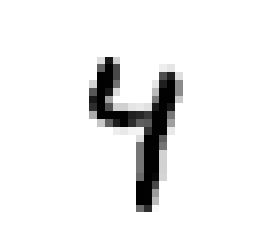

4


In [13]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

len=tx.shape[0]
index=random.randrange(len)
print(index)

adigit=tx[index]
adigit_image=adigit.reshape(28,28)

plt.imshow(adigit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(np.argmax(ty[index]))

In [14]:
digit = adigit.reshape(1,784)
digit.shape

(1, 784)

In [18]:
y_pred = tf.matmul(digit,W_trained)+b_trained
print(y_pred)
pred = tf.argmax(y_pred, 1)
print(pred)

Tensor("add_3:0", shape=(1, 10), dtype=float32)
Tensor("ArgMax_4:0", shape=(1,), dtype=int64)


In [16]:
with tf.Session() as sess:
    print(sess.run(pred))

[4]
